In [169]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [170]:
# Try reading the file with encoding='utf-8'
try:
    tweet = pd.read_csv('tweet_sentiment.csv', encoding='utf-8')
except UnicodeDecodeError:
    # Fallback: if utf-8 fails, try 'ISO-8859-1'
    tweet = pd.read_csv('tweet_sentiment.csv', encoding='ISO-8859-1')


In [171]:
tweet.head()

,tweet,sentiment
0,The event starts at 5 PM.,neutral
1,I hate how this turned out.,negative
2,Fantastic experience!,positive
3,Fantastic experience!,positive
4,This is the worst thing ever!,negative


In [172]:
tweet.shape

(1027, 2)

In [173]:
tweet.duplicated().sum().item()

983

In [174]:
tweet.isnull().sum()

tweet        0
sentiment    0
dtype: int64

In [175]:
tweet['tweet'][995]

'Itâ\x80\x99s cloudy outside.'

In [176]:
# tweet['sentiment'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

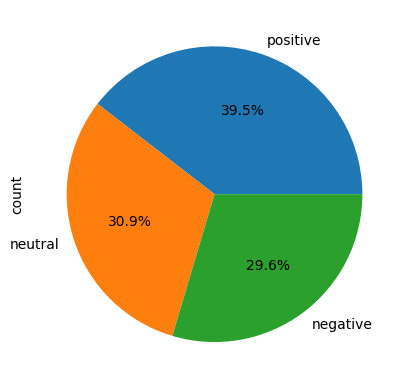

In [177]:
tweet['sentiment'].value_counts().plot(kind='pie', autopct='%.1f%%')

In [178]:
stop_words = set(stopwords.words('english')) - {'not', 'no', 'nor', 'never'}
stemmer = PorterStemmer()

def preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove URLs, mentions, hashtags
    text = re.sub(r'http\S+|@\S+|#\S+', '', text)
    # Remove punctuation and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Tokenize and remove stopwords
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return ' '.join(words)

In [179]:
tweet['tweet'] = tweet['tweet'].apply(preprocess)

In [180]:
all_words = ' '.join(tweet['tweet'])


In [181]:
len(all_words)

14818

In [182]:
from collections import Counter

# Tokenize
tokens = all_words.split()
# Count frequency
word_freq = Counter(tokens)
# Get top 20 most common
common_words = word_freq.most_common(20)
print(common_words)

[('day', 165), ('experi', 73), ('fantast', 71), ('absolut', 71), ('love', 70), ('event', 69), ('start', 69), ('pm', 69), ('happi', 69), ('news', 67), ('made', 67), ('work', 67), ('home', 67), ('today', 66), ('tuesday', 66), ('updat', 66), ('wonder', 63), ('cloudi', 63), ('outsid', 63), ('team', 61)]


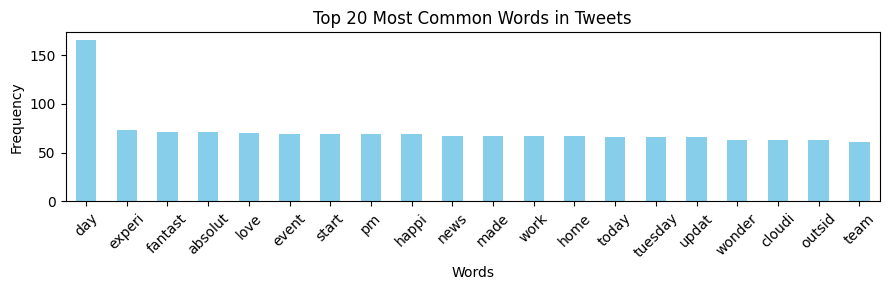

In [183]:
import matplotlib.pyplot as plt


# Convert common_words (list of tuples) into a DataFrame
common_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot using pandas
common_df.set_index('word')['count'].plot(kind='bar', figsize=(9, 3), color='skyblue')

plt.title("Top 20 Most Common Words in Tweets")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [184]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 3), max_features=1000)
X = vectorizer.fit_transform(tweet['tweet']).toarray()
y = tweet['sentiment']  # Target column

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [186]:
X_train.shape

(718, 233)

In [187]:
X_test.shape

(309, 233)

In [188]:
model = LogisticRegression()

# Train the model using the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [189]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9967637540453075


In [191]:
import pickle

In [192]:
with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

with open('vectorizer.pkl', 'wb') as file:
    pickle.dump(vectorizer, file)


In [193]:
def prediction(text):
    processed_text = preprocess(text)
    text_list = [processed_text] # wrap the preproccessed comment
    text_vector = vectorizer.transform(text_list)
    predicted_result = model.predict(text_vector)[0]
    return predicted_result


In [194]:
print(prediction(' i have a lot of feeling for love'))


positive
